<a href="https://colab.research.google.com/github/robinacharya/Ensemble-Machine-Learning-Algorithms-for-Real-World-Data-RWD-/blob/GBM/GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Load the dataset
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset from Google Drive
path_to_dataset = "/content/drive/MyDrive/german_credit_data.csv"
df = pd.read_csv(path_to_dataset)

In [6]:
# Display the first few rows of the dataset to understand its structure
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [7]:
# Encode categorical variables if necessary
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [8]:
# Define features and target variable
X = df.drop(columns=['Risk'])
y = df['Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize the baseline Gradient Boosting Model
baseline_gbm = GradientBoostingClassifier(random_state=42)
baseline_gbm.fit(X_train, y_train)

# Predict on the test set using the baseline model
y_pred_baseline = baseline_gbm.predict(X_test)

In [10]:
# Evaluate the performance of the baseline model
print("Baseline GBM Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline))
print("Classification Report:\n", classification_report(y_test, y_pred_baseline))

Baseline GBM Model Performance
Accuracy: 0.775
Confusion Matrix:
 [[ 25  34]
 [ 11 130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.42      0.53        59
           1       0.79      0.92      0.85       141

    accuracy                           0.78       200
   macro avg       0.74      0.67      0.69       200
weighted avg       0.76      0.78      0.76       200



In [11]:
# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [4, 8]
}

# Initialize GridSearchCV with the Gradient Boosting Classifier
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best estimator
best_gbm = grid_search.best_estimator_
# Print the best parameters found by GridSearchCV
print("Best Parameters Found by GridSearchCV:\n", grid_search.best_params_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best Parameters Found by GridSearchCV:
 {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 300}


In [13]:
# Train the best estimator with the training data
best_gbm.fit(X_train, y_train)

# Predict on the test set using the tuned model
y_pred_tuned = best_gbm.predict(X_test)

In [14]:
# Evaluate the performance of the tuned model
print("Tuned GBM Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))

Tuned GBM Model Performance
Accuracy: 0.77
Confusion Matrix:
 [[ 22  37]
 [  9 132]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.37      0.49        59
           1       0.78      0.94      0.85       141

    accuracy                           0.77       200
   macro avg       0.75      0.65      0.67       200
weighted avg       0.76      0.77      0.74       200



Tuned GBM Model Performance
Accuracy: 0.77
Confusion Matrix:
 [[ 22  37]
 [  9 132]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.37      0.49        59
           1       0.78      0.94      0.85       141

    accuracy                           0.77       200
   macro avg       0.75      0.65      0.67       200
weighted avg       0.76      0.77      0.74       200



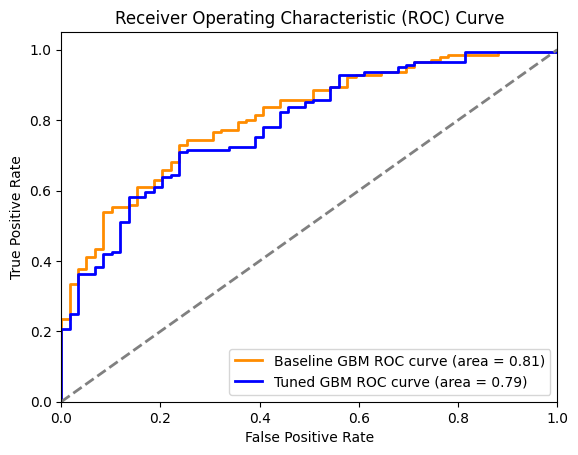

In [12]:
# Import necessary modules
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt # Import matplotlib

# Calculate predicted probabilities for the baseline model (replace 'your_baseline_model' with the actual model object)
y_prob_baseline = baseline_gbm.predict_proba(X_test)[:, 1]  # Assuming binary classification, take probabilities for class 1

# Assuming you have y_pred_baseline and y_prob_baseline from your baseline model evaluation
# If not, you need to calculate them first
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_prob_baseline)  # Calculate fpr_baseline, tpr_baseline
roc_auc_baseline = auc(fpr_baseline, tpr_baseline)  # Calculate roc_auc_baseline

y_pred_tuned = best_gbm.predict(X_test)
y_prob_tuned = best_gbm.predict_proba(X_test)[:, 1]

# Evaluate the performance of the tuned model
print("Tuned GBM Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))

# Compute ROC curve and ROC area for tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plotting the ROC curves
plt.figure()
plt.plot(fpr_baseline, tpr_baseline, color='darkorange', lw=2, label='Baseline GBM ROC curve (area = %0.2f)' % roc_auc_baseline)
plt.plot(fpr_tuned, tpr_tuned, color='blue', lw=2, label='Tuned GBM ROC curve (area = %0.2f)' % roc_auc_tuned)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
